## Compute the camera calibration using chessboard images

In [1]:
# -*- coding=UTF-8 -*-
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pickle 

%matplotlib inline

OK

There are 3 images not found corners!


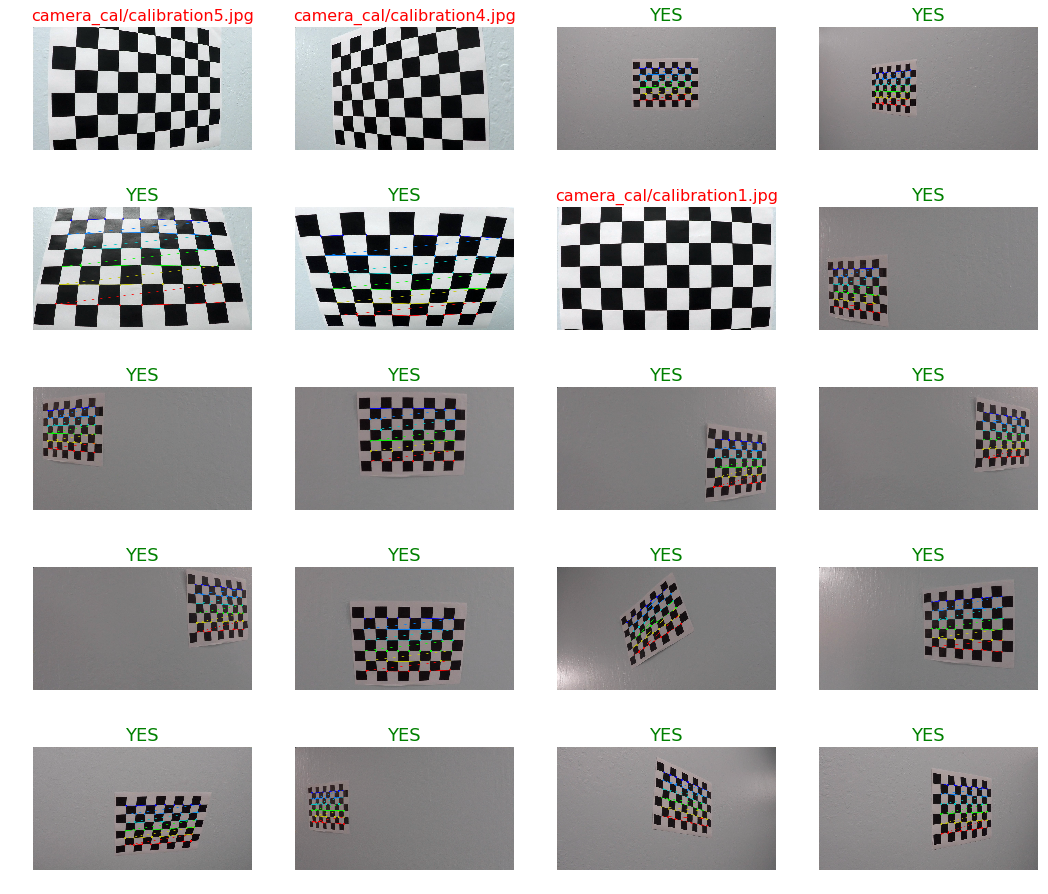

In [2]:
ncol = 9 # number of internal corners horizontal direction
nrow = 6 # number of internal corners vertical direction

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)......
objp = np.zeros((ncol*nrow,3), np.float32)
objp[:,:2] = np.mgrid[0:ncol, 0:nrow].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
images_num = len(images)
dcol = 4
drow = (images_num + dcol - 1)//dcol
imagenotfindcorners = []
plt.figure(figsize=(18, 16))

# Step through the list and search for chessboard corners
for i, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (ncol, nrow), None)

    plt.subplot(drow, dcol, i+1)
    
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (ncol, nrow), corners, ret)
        
        plt.imshow(img)
        plt.title("YES", color="green", fontsize=18)
        
    else:
        plt.imshow(img)
        #plt.title("NO", color="red", fontsize=18)
        plt.title(fname, color="red", fontsize=16)
        
        imagenotfindcorners.append(fname)
    
    plt.axis("off")
        

print('OK')
print("\nThere are %d images not found corners!"%len(imagenotfindcorners))

In [3]:
print(objp.shape)
print(corners.shape)
print("(images, points, coord) =",np.shape(objpoints))
print("(images, points, coord1,coord2) =",np.shape(imgpoints))
print(corners.shape)
print(corners[0])
print(corners[0][0])
print(corners[0][0][0])

(54, 3)
(54, 1, 2)
(images, points, coord) = (17, 54, 3)
(images, points, coord1,coord2) = (17, 54, 1, 2)
(54, 1, 2)
[[ 710.16033936  216.4934845 ]]
[ 710.16033936  216.4934845 ]
710.16


### Get Camera Matix and Save

In [4]:
fname = 'camera_cal/calibration'+ str(2) + '.jpg'
img = cv2.imread(fname)
img_size = img.shape[:2][::-1]

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

outfile = "camera_matrix.npz"
np.savez(outfile, mtx=mtx, dist=dist)

# data = [mtx, dist]
# pickle.dump( data, open( "camera_matrix.pkl", "wb" ) )

In [5]:
# img = cv2.imread("camera_cal/calibration2.jpg")
# img_size = img.shape[:2][::-1]

# ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

# # Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
# save_file = "camera_matrix_pickle.p"
# dist_pickle = {}
# dist_pickle["mtx"] = mtx
# dist_pickle["dist"] = dist
# pickle.dump( dist_pickle, open(save_file , "wb" ) )

In [6]:
npzfile = np.load(outfile)
npzfile.files

['mtx', 'dist']

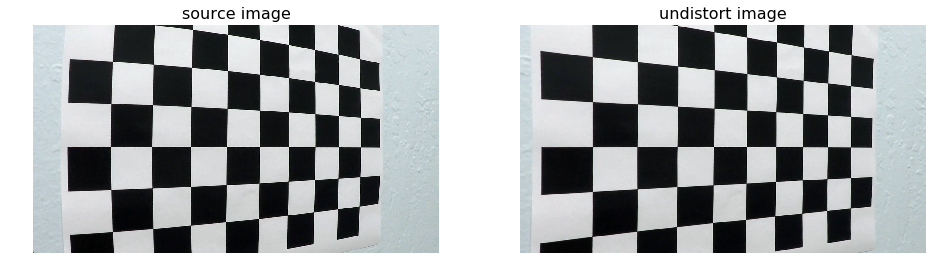

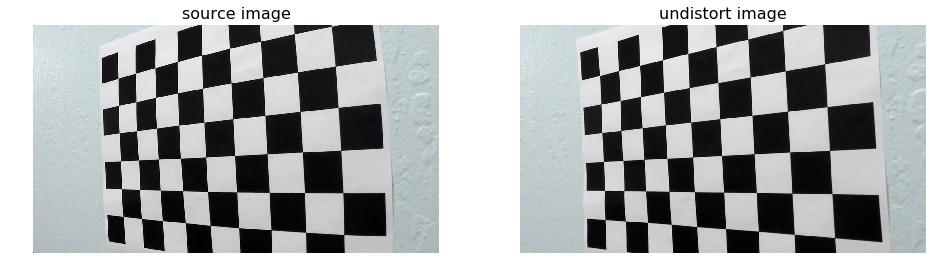

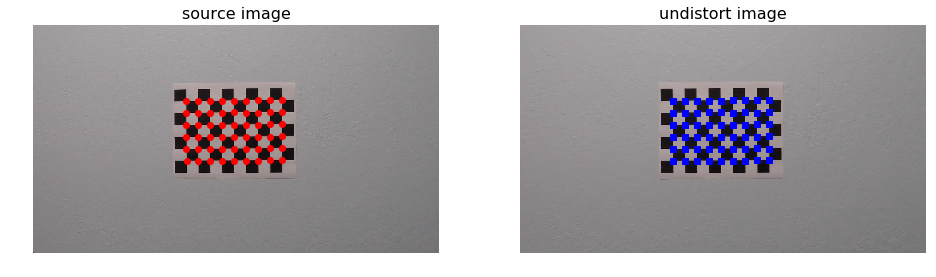

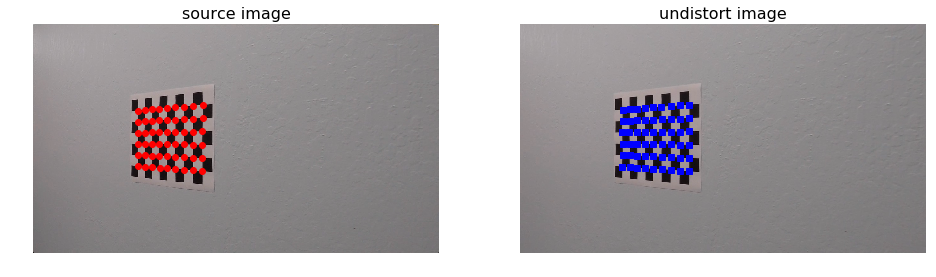

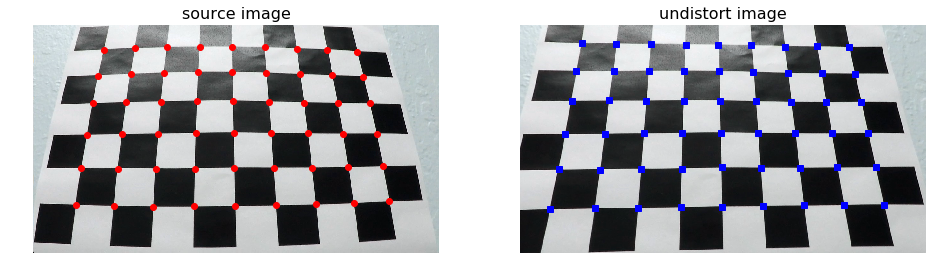

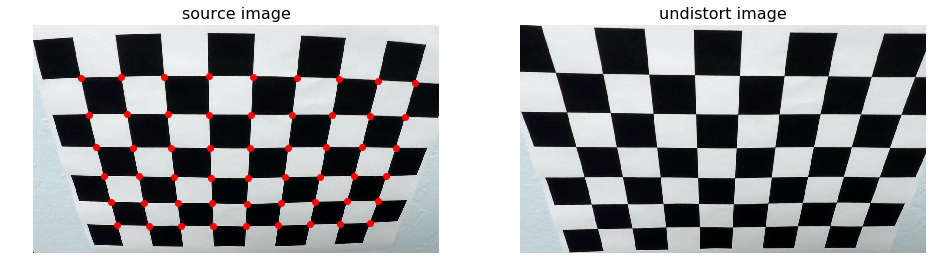

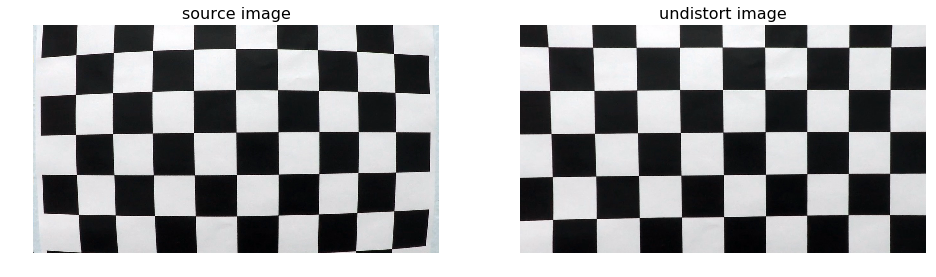

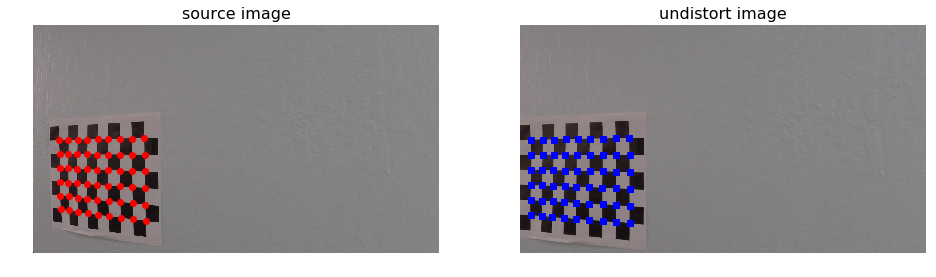

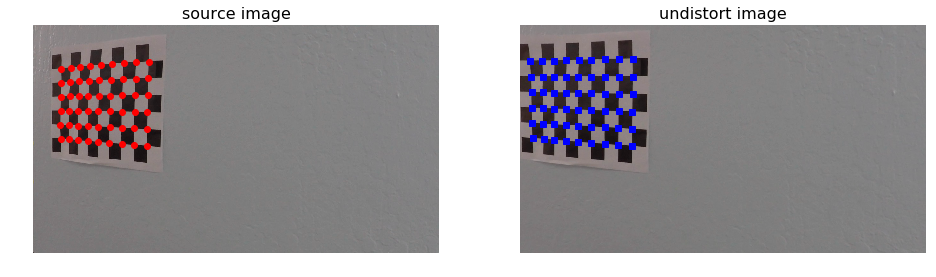

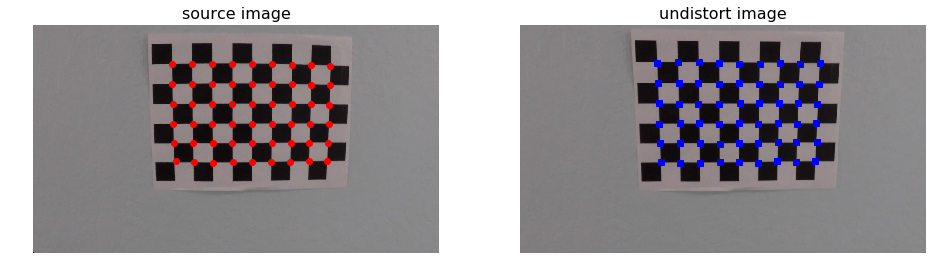

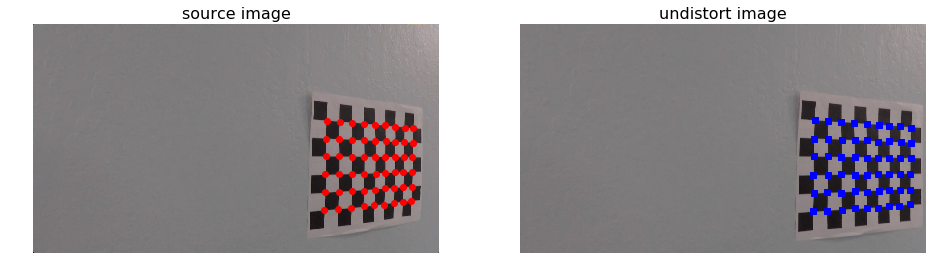

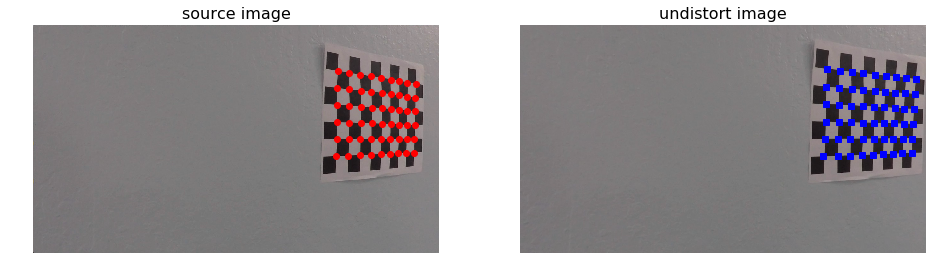

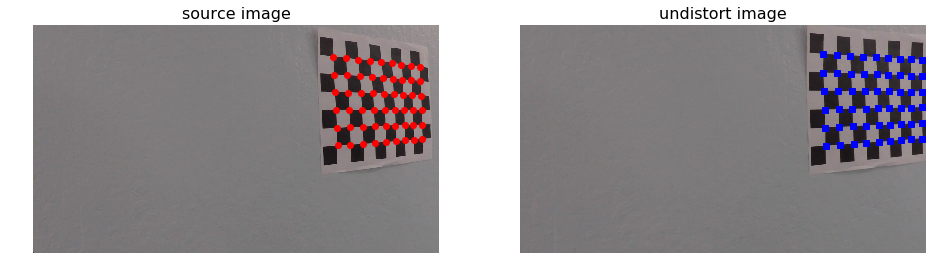

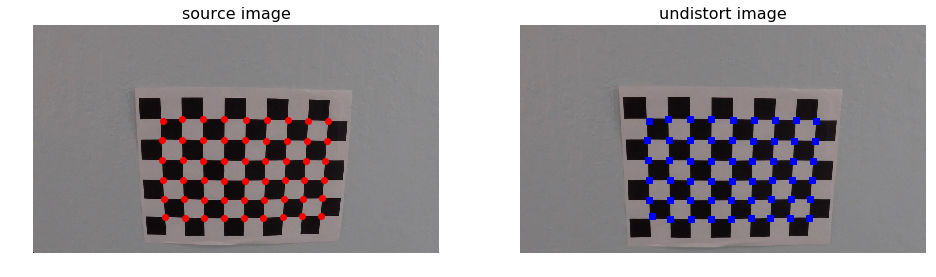

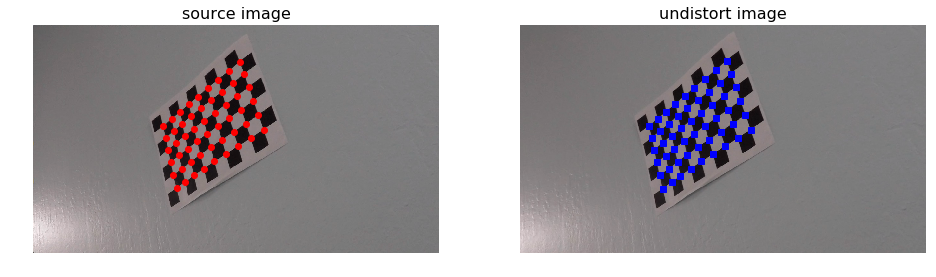

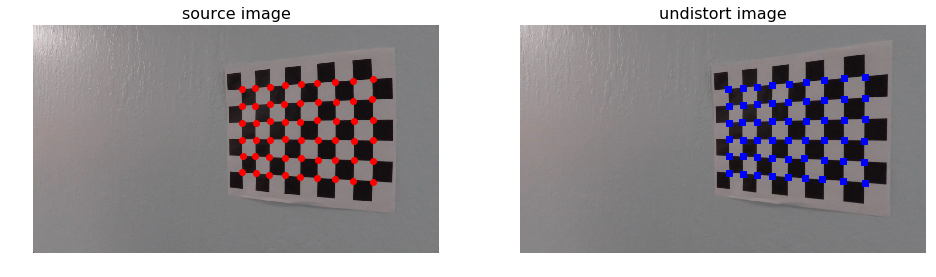

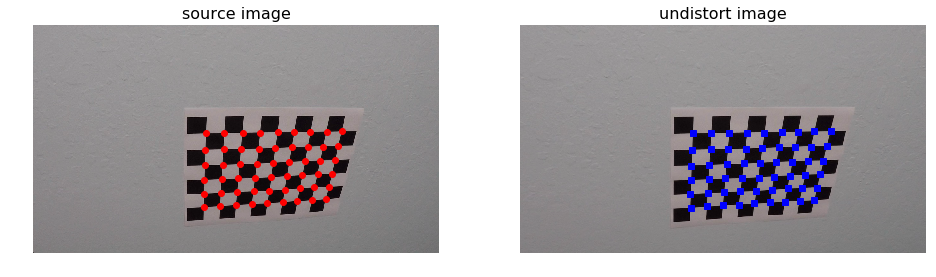

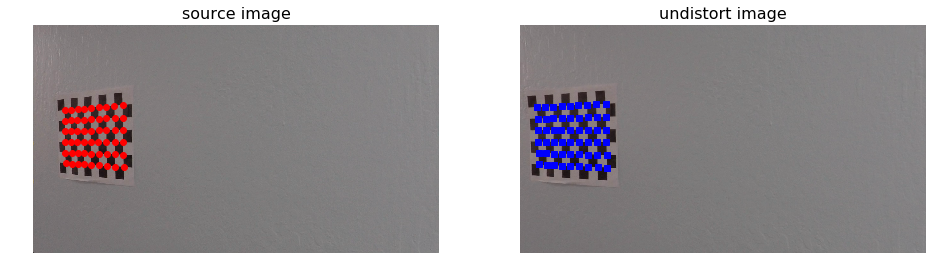

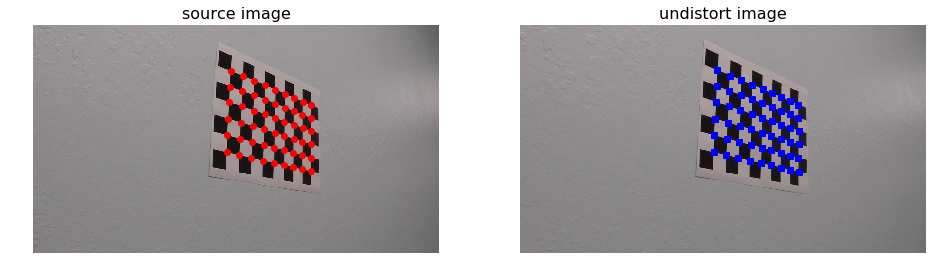

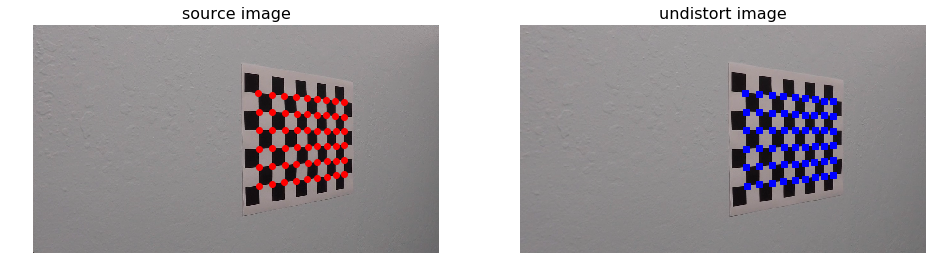

In [7]:
# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    img_size = img.shape[:2][::-1]
    plt.figure(figsize=(16,8))

    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (ncol, nrow), None)
    ret_ud, corners_ud = cv2.findChessboardCorners(undist, (ncol, nrow), None)
    
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("source image", fontsize=16)
    plt.axis('off')
    if ret == True:
        for i_c in range(len(corners)):
            plt.plot(corners[i_c][0][0], corners[i_c][0][1], 'ro')
    
    
    
    plt.subplot(1,2,2)
    plt.imshow(undist)
    plt.title("undistort image", fontsize=16)
    plt.axis('off');
    if ret_ud == True:
        for i_c in range(len(corners_ud)):
            plt.plot(corners_ud[i_c][0][0], corners_ud[i_c][0][1], 'bs')
    
    plt.show();